<a href="https://colab.research.google.com/github/juanagustinmasi/VacunarTech/blob/main/TP3/Cuaderno_2_martes_grupo6_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Introduccion**
En este notebook se usara Keras, MNIST y CatBoost para clasificación de dígitos del 0 al 9 escritos a mano para crear una Convolutional Neural Network (CNN) para crear un modelo que identifica y predice una imagen de un dígito que nunca ha visto con un 99% de exactitud a mano.


# **2.Armado del Ambiente**

Instalacion de CatBoost para data science (CatBoost es una biblioteca de código abierto de alto rendimiento para boostear el gradiente en árboles de decisión)

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2 MB 4.9 kB/s 


Importacion de bibliotecas y catboost

In [ ]:
import catboost 
import keras
from keras.datasets import mnist

import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

CatBoost se usa para problemas de aprendizaje supervisado, donde usamos los datos de entrenamiento (con múltiples funciones)  para predecir una variable objetivo. 
El modelo en nuestro aprendizaje supervisado generalmente se refiere a la estructura matemática por la cual la predicción ` Yi` se hace a partir de la entrada  `Xi` . Un ejemplo común es un modelo lineal , donde la predicción se da como sumatory.png  , una combinación lineal de características de entrada ponderadas. El valor de predicción puede tener diferentes interpretaciones, dependiendo de la tarea, es decir, regresión o clasificación.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols =  x_train.shape[1:3]

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

D_train = catboost.Pool(x_train, y_train)
D_val = catboost.Pool(x_test, y_test)

11501568/11490434 [==============================] - 0s 0us/step


*Los parámetros son la parte indeterminada que necesitamos aprender de los datos. En problemas de regresión lineal, los parámetros son los coeficientes `Theta`. Usualmente usaremos `Theta` para denotar los parámetros.*

# **3.Desarrollo**

Realizamos la ejecución del modelo sobre GPU.

In [ ]:
params = dict()
params['learning_rate'] = 0.10
params['depth'] = 6
params['l2_leaf_reg'] = 4
params['rsm'] = 1.0

model = catboost.CatBoostClassifier(iterations=1000,
                                    learning_rate=params['learning_rate'],
                                    depth=int(params['depth']),
                                    loss_function='MultiClass',
                                    use_best_model=True,
                                    eval_metric='MultiClass',
                                    l2_leaf_reg=params['l2_leaf_reg'],
                                    od_pval=1e-3,
                                    random_seed=123456,
                                    verbose=False,
                                    task_type="GPU"         #aca indicamos si queremos correr la NN en GPU o CPU
                                   )

model.fit(D_train, eval_set=D_val, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Ahora lo realizamos con CPU
**Va a tardar aprox 23 minutos en ejecutar**

In [ ]:
params = dict()
params['learning_rate'] = 0.10
params['depth'] = 6
params['l2_leaf_reg'] = 4
params['rsm'] = 1.0

model = catboost.CatBoostClassifier(iterations=1000,
                                    learning_rate=params['learning_rate'],
                                    depth=int(params['depth']),
                                    loss_function='MultiClass',
                                    use_best_model=True,
                                    eval_metric='MultiClass',
                                    l2_leaf_reg=params['l2_leaf_reg'],
                                    od_pval=1e-3,
                                    random_seed=123456,
                                    verbose=False,
                                    task_type="CPU"         #aca indicamos si queremos correr la NN en GPU o CPU
                                   )

model.fit(D_train, eval_set=D_val, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Predecimos el modelo y lo imprimimos**

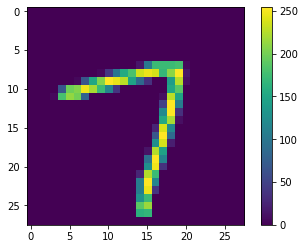

Prediction: [7]


In [ ]:
sample = np.random.randint(0, 1000)

plt.figure()
plt.imshow(x_test[sample].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

print('Prediction:', model.predict(x_test[sample]))

# **4.Metricas**

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## **5.Conclusiones**
Uno de los problemas surgidos en el desarrollo del ejercicio, fue utilizar el procesamiento con CPU ya que tardaba demasiado en ejecutar para obtener los resultados, lo que demoraba las pruebas para comparar la eficiencia entra GPU y CPU. 
Adicionalmente, tuvimos que descargar la biblioteca CatBoost porque no esta incluida en la API de tensorFlow.
La conclusion de mayor importancia que encontramos, realizando este notebook, es la gran diferencia de tiempo que hay utlizando el procesamiento con GPU contra el procesamiento con CPU.


# **6.Bibliografía**
1-	https://keras.io/

2-	https://catboost.ai/

3-	https://onlinelibrary.wiley.com/doi/abs/10.1002/9781119564843.ch5

4-	https://www.sciencedirect.com/science/article/abs/pii/S0040162521000901
